<a href="https://colab.research.google.com/github/siddley1001/Investing/blob/main/Industry_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install yfinance
# %pip install ta-lib
%pip install zipline

  Using cached https://files.pythonhosted.org/packages/42/9b/5a55c79ca66e1c3ed2d94155cb71eb033eaf96cea71b81eb0579610d489f/zipline-1.4.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/2f/d9/16ac346f7c0102835814cc9e5b684aaadea101560bb932a2403bd26b2320/Logbook-1.5.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/fc/e9/092908ad6587b2537ab19fd68cea2eae520321530f23c4b82af71a38b8a1/python-interface-1.6.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/89/79/429ecef45fd5e4504f7474d4c3c3c4668c267be3370e4c2fd33e61506833/multipledispatch-0.6.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/08/01/803834bc8a4e708aedebb133095a88a4dad9f45bbaf5ad777d2bea543c7e/pandas-0.22.0.tar.gz
  Installing build dependencies ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/pip install --ignore-installed --no-user --prefix /tmp/pip-build-env-9zr9chc0/overlay --no-warn-script-location 

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Trading Libraries
# import talib #Technical Analysis Libraries: Bollinger Bands, Aroon Oscillator, MACD (MA Convergence/Divergence), RSI (Relative Strength Index)
# import zipline #Backtesting and Live Trading

#Backtesting Helper Functions

In [29]:
sma = 14
lma = 60

start = '2010-01-01'
end = '2021-12-31'

def backtest_strategy(data, sma, lma):
    data['daily_returns'] = data['Adj Close'].pct_change()

    data['sma'] = data['Adj Close'].rolling(sma).mean()
    data['lma'] = data['Adj Close'].rolling(lma).mean()

    data['signals'] = np.where(data['sma'] >= data['lma'], 1, -1)

    data.dropna(inplace = True)

    data['strategic_returns'] = data['daily_returns'] * data['signals'].shift(1)
    
    cum_s_returns = (data['strategic_returns']+ 1).cumprod()

    return round(cum_s_returns.iloc[-1] -1, 3)

def cumm_returns(ticker_list, sma, lma, start_string, end_string):
    returns = dict()
    for ticker in ticker_list:
        data = yf.download(ticker, start_string, end_string)

        ticker_return = backtest_strategy(data, sma, lma)

        print(f'Cummulative Strategy Returns for {ticker}:', ticker_return)

        returns[ticker] = ticker_return
    else:
        print('Computations Completed!')

def visualize_returns(ticker_list, sma, lma, start_string, end_string):
    returns = dict()
    colors = list()

    for ticker in ticker_list:
        data = yf.download(ticker, start_string, end_string)

        ticker_return = backtest_strategy(data, sma, lma)

        print(f'Cummulative Strategy Returns for {ticker}:', ticker_return)

        returns[ticker] = ticker_return
    
    #colors for visualization
    for k, v in returns.items():
        if v > 0:
            colors.append('lightgreen')
        else:
            colors.append('lightcoral')
    
    plt.figure(figsize = (14,7))
    plt.bar(returns.keys(), returns.values(), color = colors)
    plt.title('MAC Returns on stocks')
    plt.xlabel('Stocks')
    plt.ylabel('Returns')
    plt.show()

# Travel (Airlines)
- Delta (DAL)
- United Airlines (UAL)
- Spirit (SAVE)
- American Airlines (AAL)
- Alaska Airlines (ALK)

In [4]:
airlines = ['DAL', 'UAL', 'SAVE', 'AAL', 'ALK']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for DAL: -0.735
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for UAL: -0.995
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for SAVE: -0.309
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AAL: -0.994
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ALK: -0.413


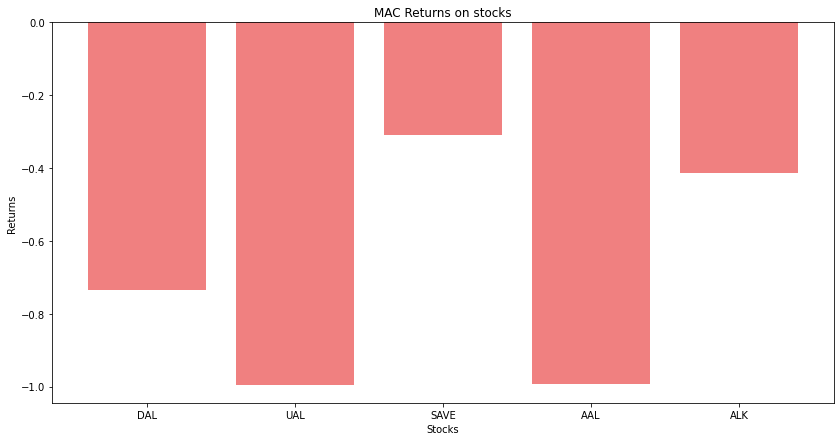

In [30]:
visualize_returns(airlines, sma, lma, start, end)

# Finance (Traditional - Banks)

- Wells Fargo (WF)
- JPMorgan Chase (JPM)
- Bank of America (BAC)
- Citi (C)







In [6]:
banks = ['WF', 'JPM', 'BAC', 'C']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for WF: -0.805
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for JPM: -0.629
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BAC: 1.145
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for C: -0.505


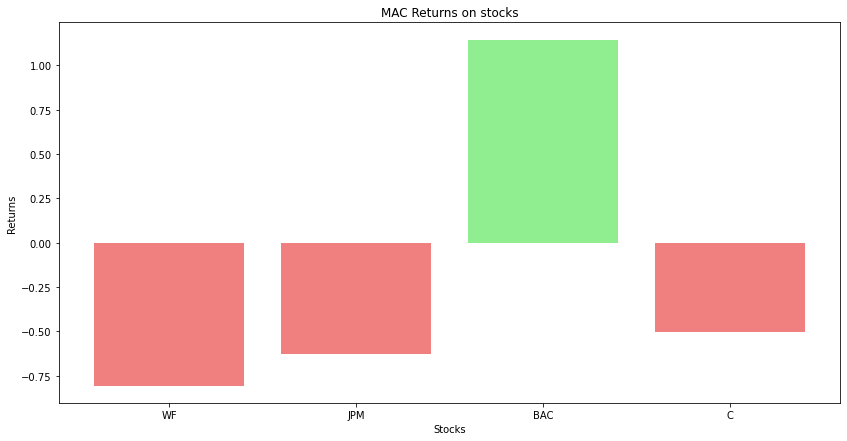

In [31]:
visualize_returns(banks, sma, lma, start, end)

# Telecommunications (Wireless Carriers)
- AT&T (T)
- Verizon (VZ)
- T-mobile (TMUS)

In [8]:
telecoms = ['T', 'VZ', 'TMUS']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for T: -0.392
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for VZ: -0.802
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TMUS: 3.555


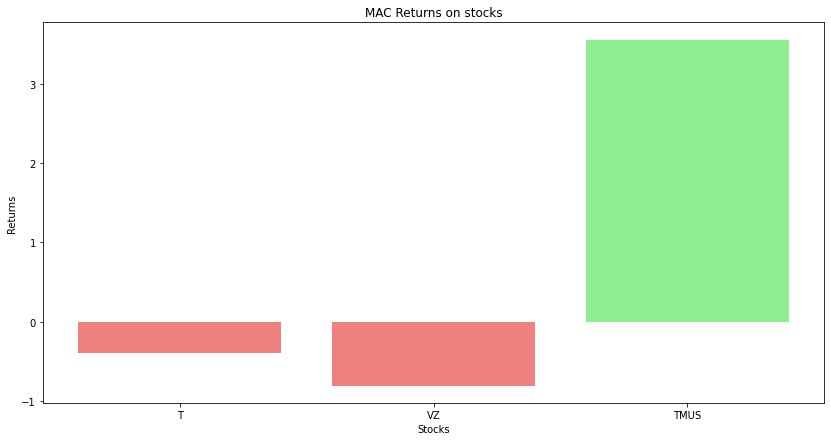

In [32]:
visualize_returns(telecoms, sma, lma, start, end)

# Travel (Auto)
- Tesla (TSLA)
- Ford (F)
- BMW (BMWYY)
- Toyota (TM)
- Honda (HMC)
- Nio (NIO)

In [10]:
autos = ['TSLA', 'F', 'BMWYY', 'TM', 'HMC', 'NIO']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TSLA: 0.383
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for F: 0.372
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BMWYY: -0.783
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TM: -0.107
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HMC: -0.396
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for NIO: 5.285


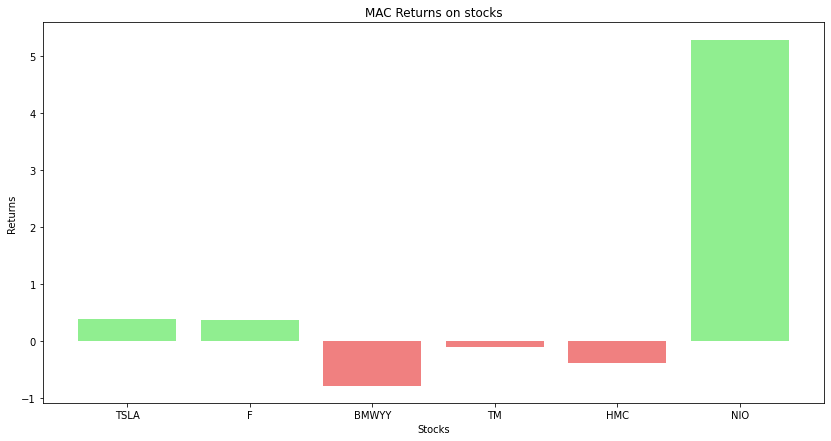

In [33]:
visualize_returns(autos, sma, lma, start, end)

# HealthCare

*   Hospital conglomerates

*   Insurance companies

*   Institutional services

* Drug Manufacturers

*   Medical instrument makers

*   Biomedical companies

**52.3% CAGR** with advent of AI

In [12]:
healthcare = ['SNSE', 'PDSB', 'LFMD', 'PROG', 'GTH', 'DBTX', 'IMMP', 'PRPO', 'IMAB']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for SNSE: -0.08
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PDSB: -0.97
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LFMD: -1.0
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PROG: 0.093
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for GTH: 0.087
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for DBTX: -0.24
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for IMMP: -0.953
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PRPO: -1.129
[*********************100%***********************]  1 of 1 completed
Cummulative Strateg

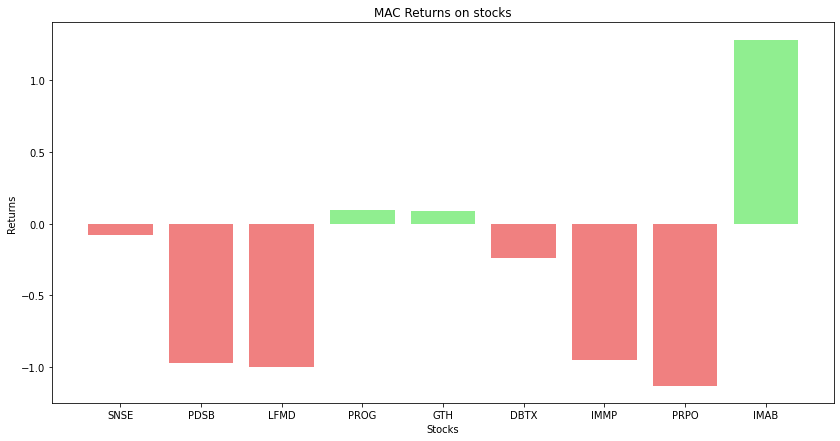

In [34]:
visualize_returns(healthcare, sma, lma, start, end)

# Computer and Tech (IT)

*   Product Manufacturers
*   Service Providers

**22% CAGR potential**


In [14]:
it = ['INTZ', 'LSPD', 'TLS', 'AUUD', 'CPSH', 'TAIT', 'AMPG', 'QRVO']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for INTZ: -1.0
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LSPD: -0.286
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TLS: -0.196
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AUUD: -0.054
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for CPSH: -1.0
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TAIT: -0.742
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AMPG: 0.981


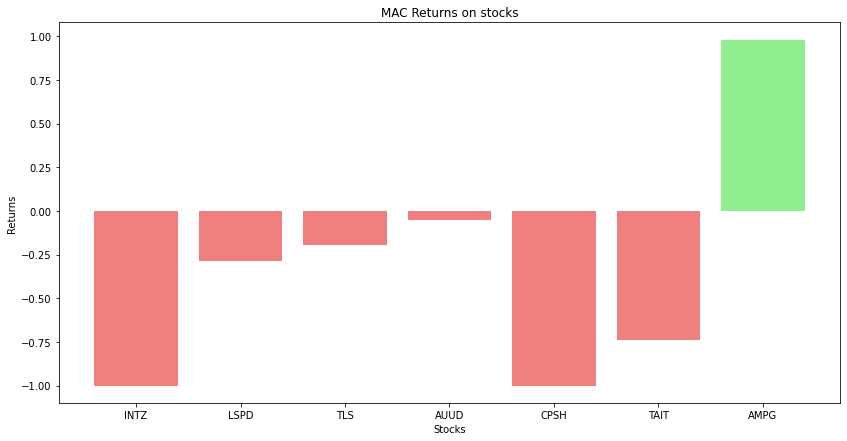

In [35]:
visualize_returns(it, sma, lma, start, end)

# Business Services

In [16]:
busiserv = ['BRPA', 'LMFA', 'OXBR', 'GHVI', 'BTCM', 'TIG', 'MFH', 'LYL', 'AMRK', 'FDBC']
busiserv_down = ['HFBL', 'BHV', 'RICE', 'ASPS', 'VERY', 'EMCF', 'MN', 'AEL']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BRPA: -0.912
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LMFA: -0.971
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for OXBR: -1.07
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for GHVI: -0.007
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BTCM: -0.542
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for TIG: -0.138
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for MFH: -0.109
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LYL: -0.962
[*********************100%***********************]  1 of 1 completed
Cummulative Str

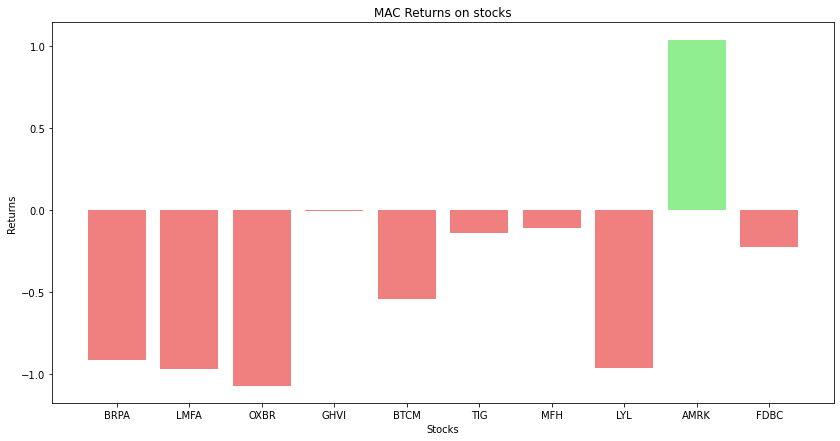

In [36]:
visualize_returns(busiserv, sma, lma, start, end)

In [18]:
cumm_returns(busiserv_down, sma, lma, start, end)

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HFBL: -0.075
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BHV: -0.257
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RICE: -0.555
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ASPS: -0.965
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for VERY: -0.786
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for EMCF: -0.873
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for MN: -0.977
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AEL: -0.972
Computations Completed!


# Fast Moving Consumer Goods (FMCG)

In [22]:
fmcg = ['PLIN', 'REDU', 'HIMS', 'HRL', 'UG', 'AMBO', 'FEDU', 'CELH', 'PETZ', 'CLEU']
fmcg_down = ['COE', 'LXEH', 'PME', 'REED', 'BJ', 'METX', 'ONE', 'RLX']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PLIN: -0.303
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for REDU: -0.656
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HIMS: -0.101
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HRL: -0.421
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for UG: -0.751
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AMBO: -1.014
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for FEDU: -0.107
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for CELH: -1.0
[*********************100%***********************]  1 of 1 completed
Cummulative Stra

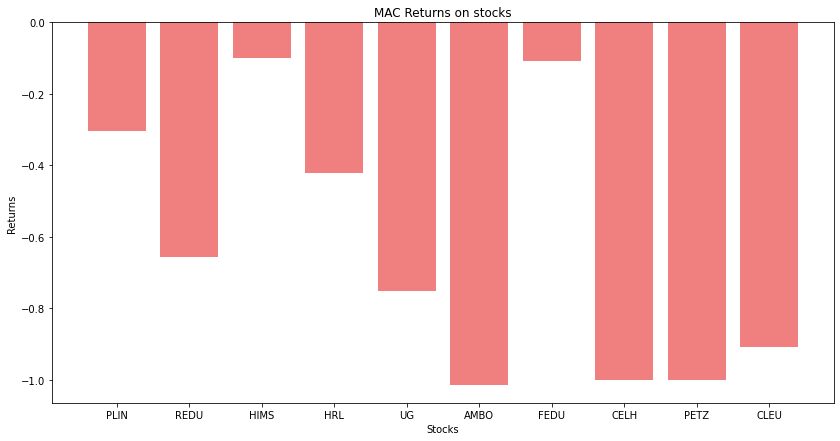

In [37]:
visualize_returns(fmcg, sma, lma, start, end)

In [24]:
cumm_returns(fmcg_down, sma, lma, start, end)

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for COE: -0.912
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LXEH: -0.405
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PME: -0.732
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for REED: 2.82
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BJ: -0.464
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for METX: 0.635
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ONE: -0.317
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RLX: -0.265
Computations Completed!


# Consumer Discretionary
AKA cylical consumer stocks

In [39]:
cd = ['BBQ', 'BBIG', 'MRM', 'FORD', 'OCG', 'CATO', 'AUVI', 'RICK', 'POSH', 
      'DIS', 'HLT', 'WMT']
cd_down = ['RIDE', 'FOSL', 'KSS', 'ANF', 'RL', 'URBN', 'JWN', 'LOTZ', 'LCUT']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BBQ: -0.815
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for BBIG: -1.06
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for MRM: -0.084
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for FORD: -0.985
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for OCG: -1.051
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for CATO: 1.185
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AUVI: 0.767
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RICK: -0.621
[*********************100%***********************]  1 of 1 completed
Cummulative Strat

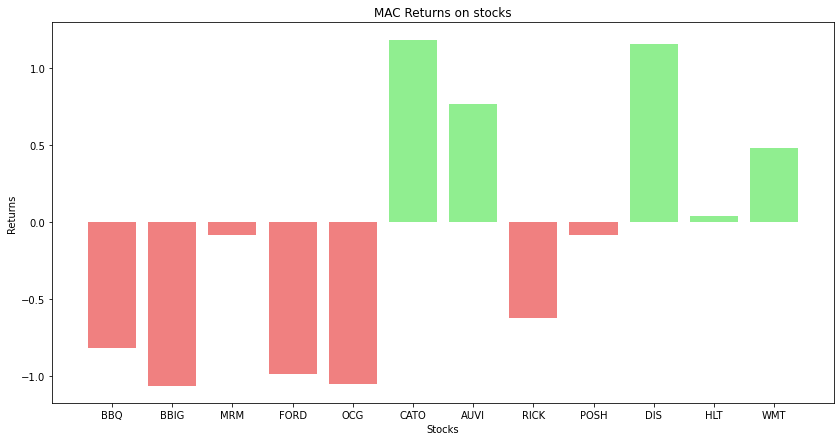

In [40]:
visualize_returns(cd, sma, lma, start, end)

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RIDE: -0.653
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for FOSL: -0.96
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for KSS: -0.653
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ANF: -0.806
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for RL: -0.641
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for URBN: 0.294
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for JWN: -0.528
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for LOTZ: 0.282
[*********************100%***********************]  1 of 1 completed
Cummulative Strateg

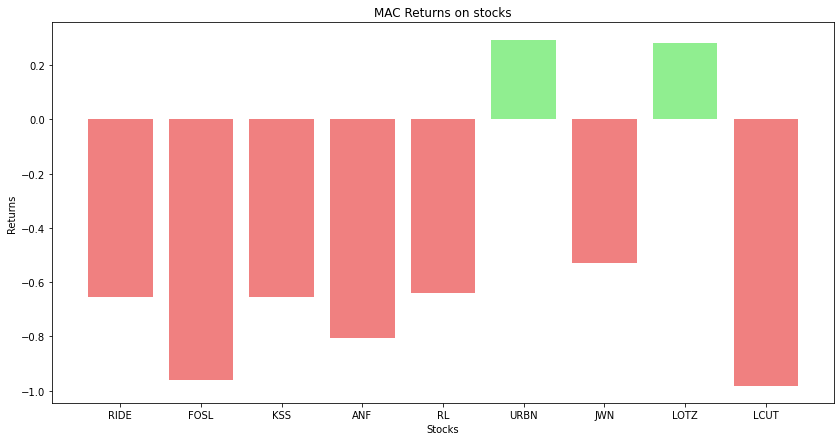

In [41]:
visualize_returns(cd_down, sma, lma, start, end)

#Real Estate

In [46]:
real_estate = ['O', 'SPG', 'PSA', 'DLR', 'AMT', 'STAG', 'NTP', 'IHT',
               'AEI', 'CBRE', 'QK', 'HT', 'SKT', 'XHR']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for O: -0.315
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for SPG: -0.649
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for PSA: -0.597
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for DLR: -0.572
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for AMT: -0.559
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for STAG: 0.501
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for NTP: -0.158
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for IHT: -1.0
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Re

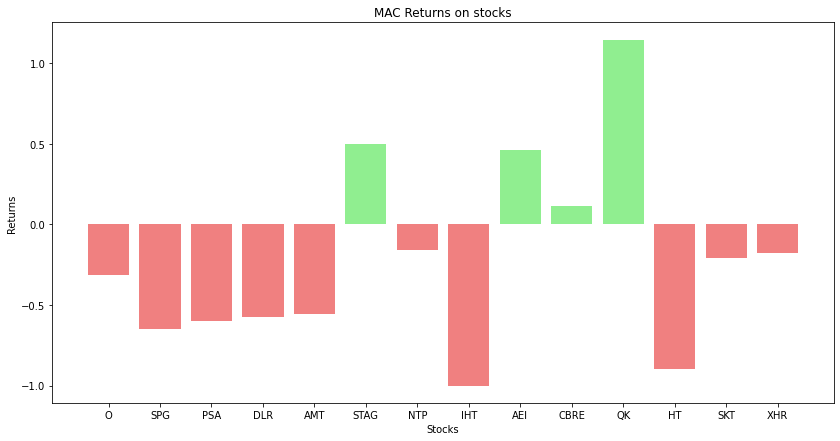

In [47]:
visualize_returns(real_estate, sma, lma, start, end)

#Materials

In [52]:
materials=['VALE', 'HUN', 'SCCO', 'FCX', 'ECL', 'APD', 'DD', 'XLB', 'CE', 'NEU', 'SCCO',
           'NUE', 'RPM', 'CC', 'OLN', 'XLB', 'RIO', 'LYB', 'IP', ]

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for VALE: -0.664
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for HUN: -0.308
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for SCCO: -0.391
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for FCX: 0.053
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for ECL: -0.761
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for APD: -0.505
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for DD: -0.372
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for XLB: -0.284
[*********************100%***********************]  1 of 1 completed
Cummulative Strateg

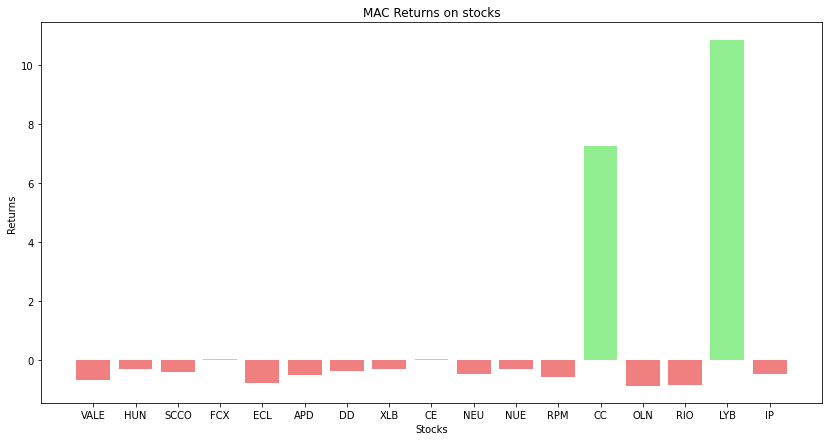

In [53]:
visualize_returns(materials, sma, lma, start, end)

#Utilities/ Energy
* Duke Electric

In [48]:
util = ['NEE', 'CVX', 'DUK', 'D', 'XEL', 'XLU', 'SRE', 'VST', 'UGI', 'WTRG', 'EIX', 'AEP', 
        'AES', 'CNP', 'DTE', 'ETR', 'IDA', 'NFG', 'NI', 'NRG', 'NOVA', 'AWK', 'BIP', 'NEE']

[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for NEE: -0.321
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for CVX: -0.507
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for DUK: -0.623
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for D: -0.501
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for XEL: -0.352
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for XLU: -0.481
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for SRE: -0.36
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy Returns for VST: -0.548
[*********************100%***********************]  1 of 1 completed
Cummulative Strategy R

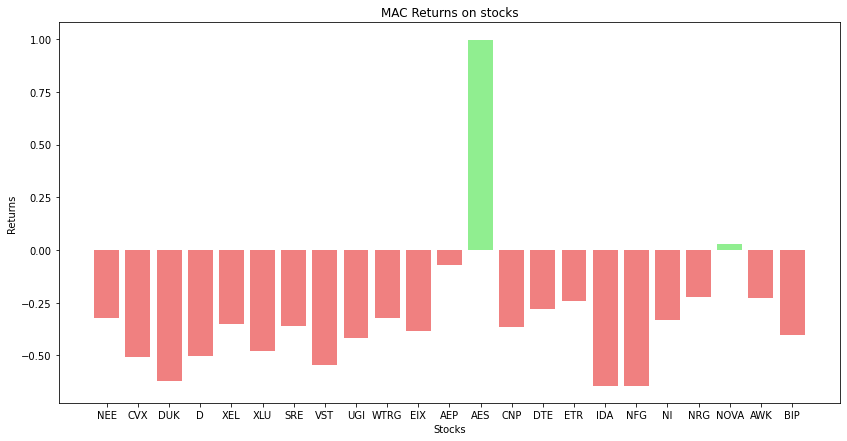

In [49]:
visualize_returns(util, sma, lma, start, end)